In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv("C:/Users/rajpu/OneDrive/Desktop/Bank Loan Case Study/Uncleaned Datasets/merged_data_uncleaned.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 63 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1413701 non-null  float64
 1   SK_ID_CURR                   1413701 non-null  float64
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  object 
 3   AMT_APPLICATION              1413701 non-null  float64
 4   AMT_CREDIT_x                 1413701 non-null  float64
 5   NAME_CASH_LOAN_PURPOSE       1413701 non-null  object 
 6   NAME_CONTRACT_STATUS         1413701 non-null  object 
 7   DAYS_DECISION                1413701 non-null  float64
 8   NAME_PAYMENT_TYPE            1413701 non-null  object 
 9   CODE_REJECT_REASON           1413701 non-null  object 
 10  NAME_CLIENT_TYPE             1413701 non-null  object 
 11  NAME_GOODS_CATEGORY          1413701 non-null  object 
 12  NAME_PORTFOLIO               1413701 non-n

In [4]:
df.drop(columns=['SK_ID_PREV', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'], inplace=True)

In [5]:
numeric_columns = []

# Loop through the columns and check data types
for col in df.columns:
    if df[col].dtype == 'float64':
        numeric_columns.append(col)
        
print("Columns with float64 data type:")
print(numeric_columns)

Columns with float64 data type:
['SK_ID_CURR', 'AMT_APPLICATION', 'AMT_CREDIT_x', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_y', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [6]:
#Renaming the columns as convention
df = df.rename({'NAME_CONTRACT_TYPE_x' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_x':'AMT_CREDIT','AMT_ANNUITY_x':'AMT_ANNUITY',
                'WEEKDAY_APPR_PROCESS_START_x':'WEEKDAY_APPR_PROCESS_START','AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE',
                'HOUR_APPR_PROCESS_START_x':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPE_y':'NAME_CONTRACT_TYPE_PREV','AMT_CREDIT_y':'AMT_CREDIT_PREV',
                'AMT_ANNUITY_y':'AMT_ANNUITY_PREV','AMT_GOODS_PRICE_y':'AMT_GOODS_PRICE_PREV',
                'WEEKDAY_APPR_PROCESS_START_y':'WEEKDAY_APPR_PROCESS_START_PREV','HOUR_APPR_PROCESS_START_y':'HOUR_APPR_PROCESS_START_PREV'}, 
               axis = 1)

In [7]:
numeric_columns = []

# Loop through the columns and check data types
for col in df.columns:
    if df[col].dtype == 'float64':
        numeric_columns.append(col)
        
print("Columns with float64 data type:")
print(numeric_columns)

Columns with float64 data type:
['SK_ID_CURR', 'AMT_APPLICATION', 'AMT_CREDIT', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_PREV', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [8]:
unique_values = {}

for column in numeric_columns:
    unique_values[column] = df[column].nunique()

In [9]:
# Print the unique values for each column
for column, values in unique_values.items():
    print(f"Unique values for {column}: {values}")

Unique values for SK_ID_CURR: 291057
Unique values for AMT_APPLICATION: 86766
Unique values for AMT_CREDIT: 81731
Unique values for DAYS_DECISION: 2922
Unique values for SELLERPLACE_AREA: 2076
Unique values for TARGET: 2
Unique values for CNT_CHILDREN: 15
Unique values for AMT_INCOME_TOTAL: 1876
Unique values for AMT_CREDIT_PREV: 5496
Unique values for AMT_ANNUITY: 13372
Unique values for AMT_GOODS_PRICE: 987
Unique values for REGION_POPULATION_RELATIVE: 81
Unique values for DAYS_BIRTH: 17448
Unique values for DAYS_EMPLOYED: 12451
Unique values for DAYS_REGISTRATION: 15607
Unique values for DAYS_ID_PUBLISH: 6161
Unique values for CNT_FAM_MEMBERS: 17
Unique values for REGION_RATING_CLIENT: 3
Unique values for REGION_RATING_CLIENT_W_CITY: 3
Unique values for HOUR_APPR_PROCESS_START: 24
Unique values for REG_REGION_NOT_LIVE_REGION: 2
Unique values for REG_REGION_NOT_WORK_REGION: 2
Unique values for LIVE_REGION_NOT_WORK_REGION: 2
Unique values for REG_CITY_NOT_LIVE_CITY: 2
Unique values fo

In [10]:
converting_dtype_to_numeric = ['SK_ID_CURR', 'AMT_APPLICATION', 'AMT_CREDIT', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'TARGET', 'CNT_CHILDREN', 
                               'AMT_INCOME_TOTAL', 'AMT_CREDIT_PREV', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 
                               'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 
                               'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'OBS_30_CNT_SOCIAL_CIRCLE', 
                               'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 
                               'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 
                               'AMT_REQ_CREDIT_BUREAU_YEAR']

In [11]:
# Convert specified columns to numeric using pd.to_numeric
for column in converting_dtype_to_numeric:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 60 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1413701 non-null  float64
 1   NAME_CONTRACT_TYPE           1413701 non-null  object 
 2   AMT_APPLICATION              1413701 non-null  float64
 3   AMT_CREDIT                   1413701 non-null  float64
 4   NAME_CASH_LOAN_PURPOSE       1413701 non-null  object 
 5   NAME_CONTRACT_STATUS         1413701 non-null  object 
 6   DAYS_DECISION                1413701 non-null  float64
 7   NAME_PAYMENT_TYPE            1413701 non-null  object 
 8   CODE_REJECT_REASON           1413701 non-null  object 
 9   NAME_CLIENT_TYPE             1413701 non-null  object 
 10  NAME_GOODS_CATEGORY          1413701 non-null  object 
 11  NAME_PORTFOLIO               1413701 non-null  object 
 12  NAME_PRODUCT_TYPE            1413701 non-n

IDENTIFYING THE OUTLIERS FROM NUMERICAL DATASET

In [13]:
def plot_numerical_counts(dataframe, numerical_columns):
    # Iterate over each column in the DataFrame
    for column in numerical_columns:
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True, bins=30, color='blue')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column], color='orange')
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)

        plt.tight_layout()
        plt.show()

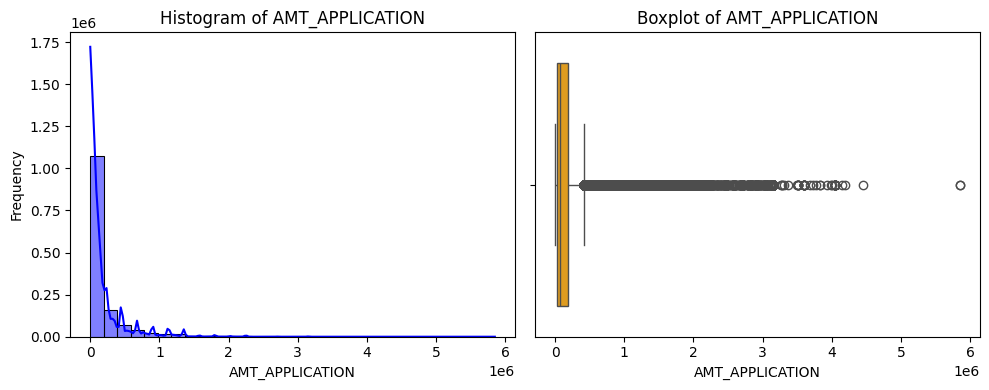

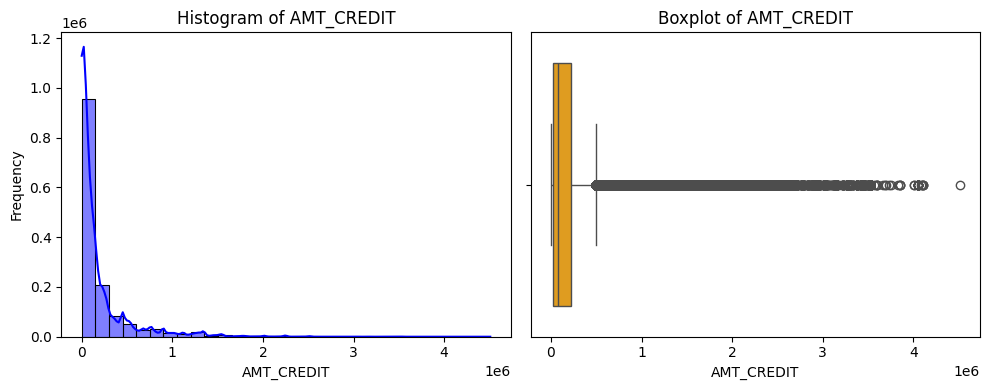

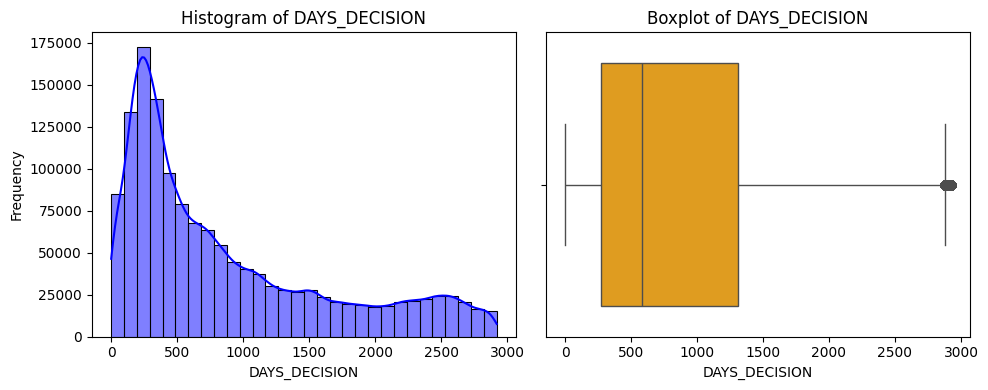

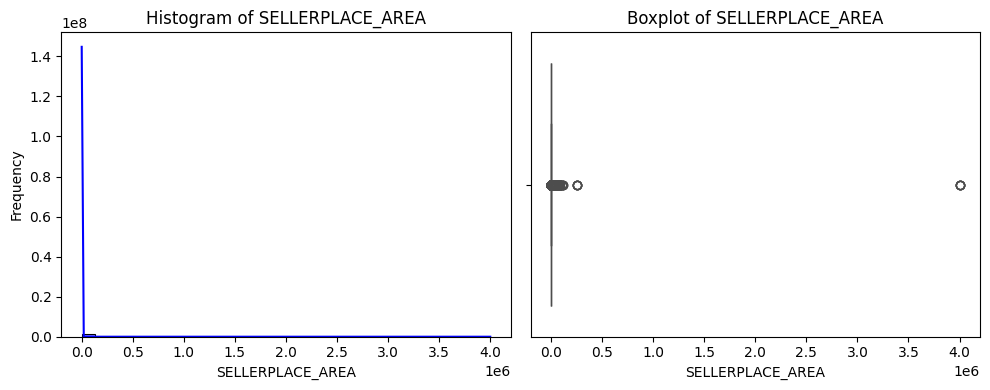

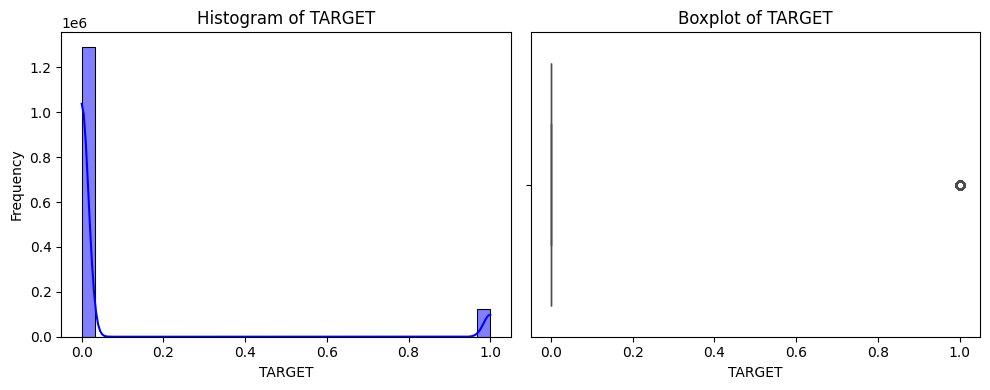

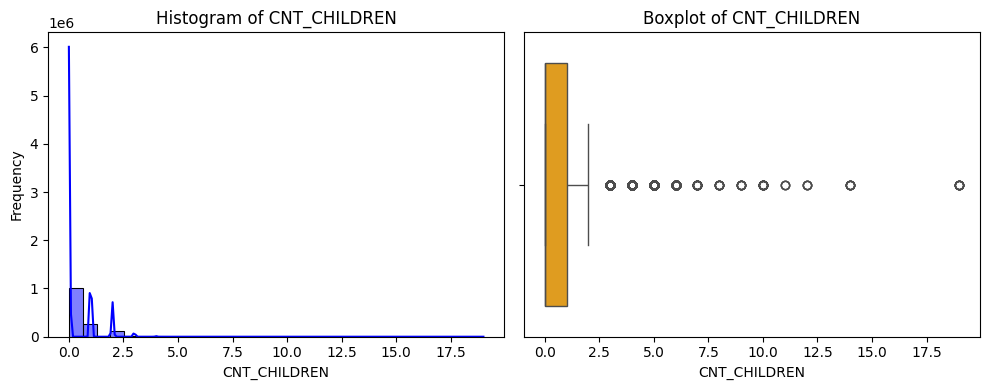

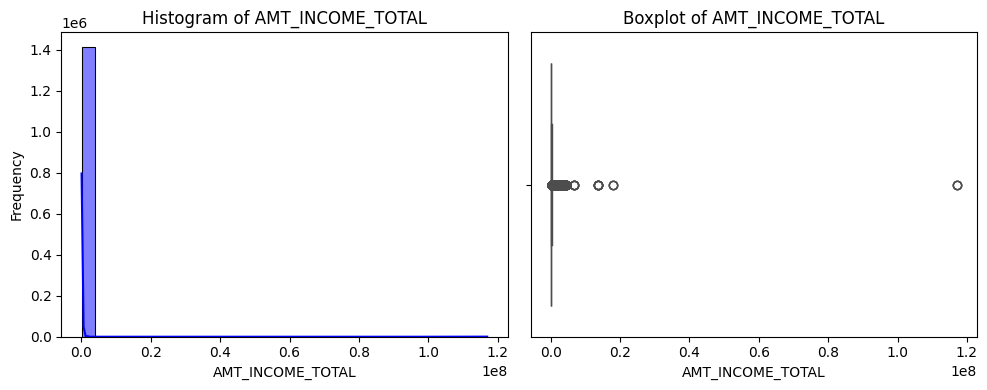

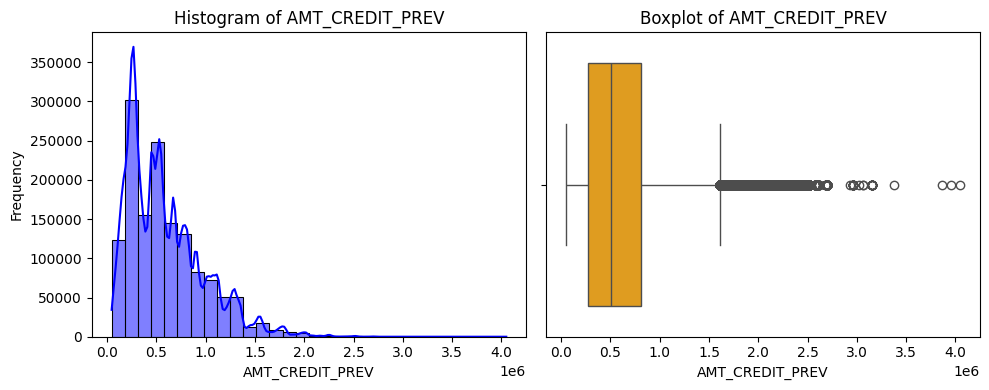

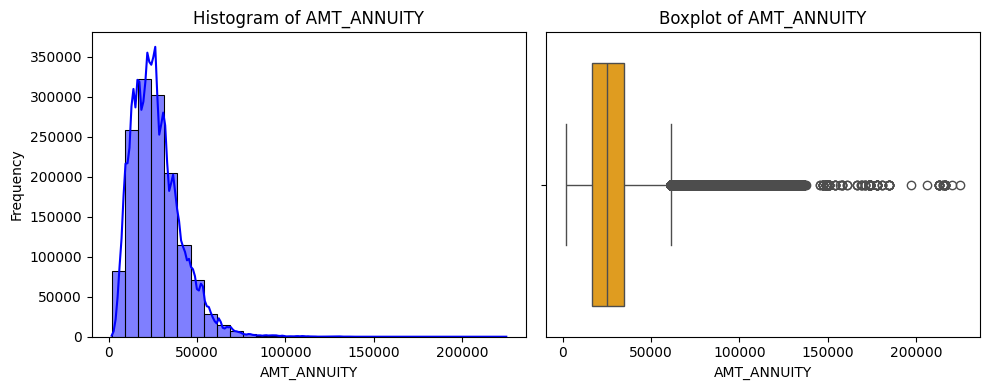

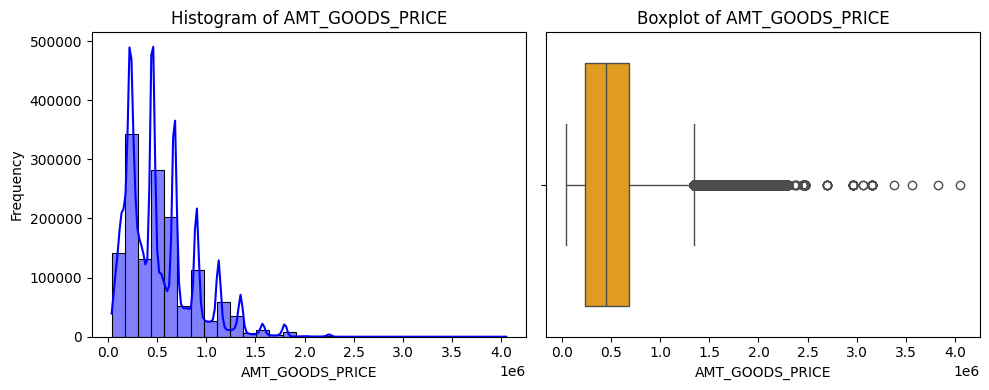

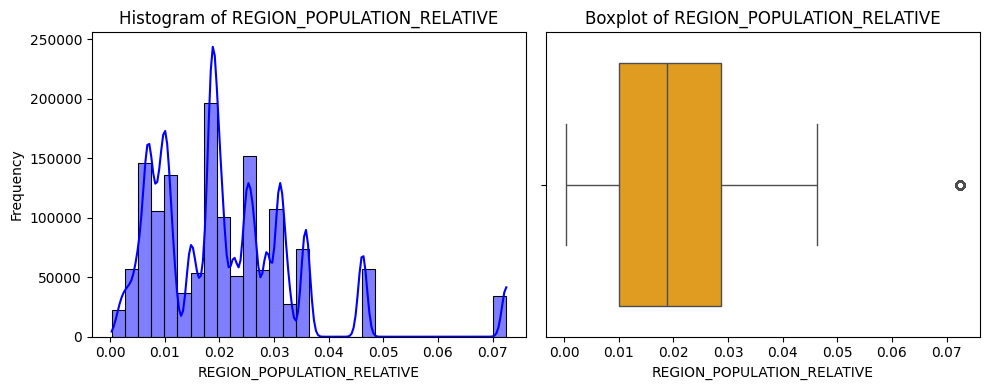

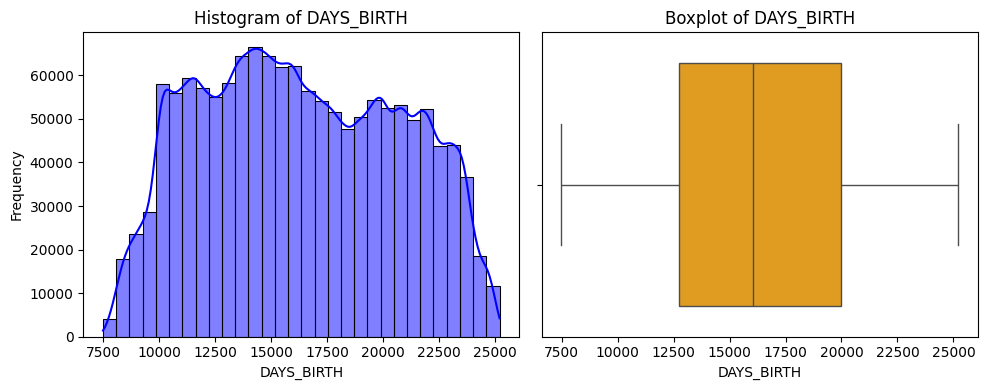

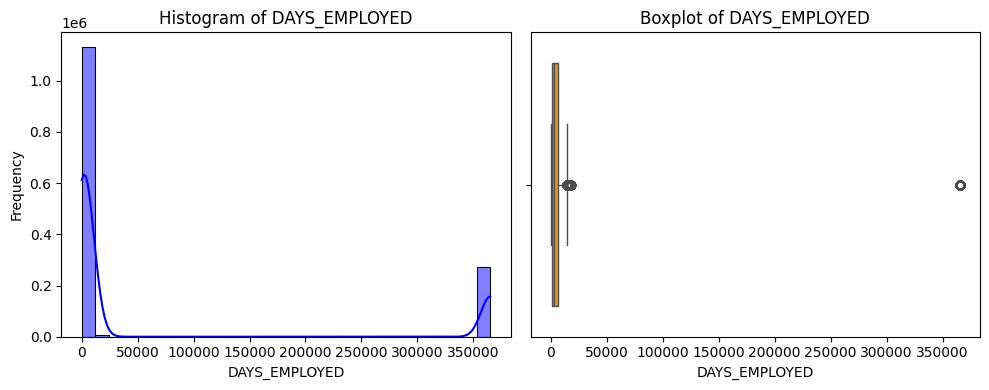

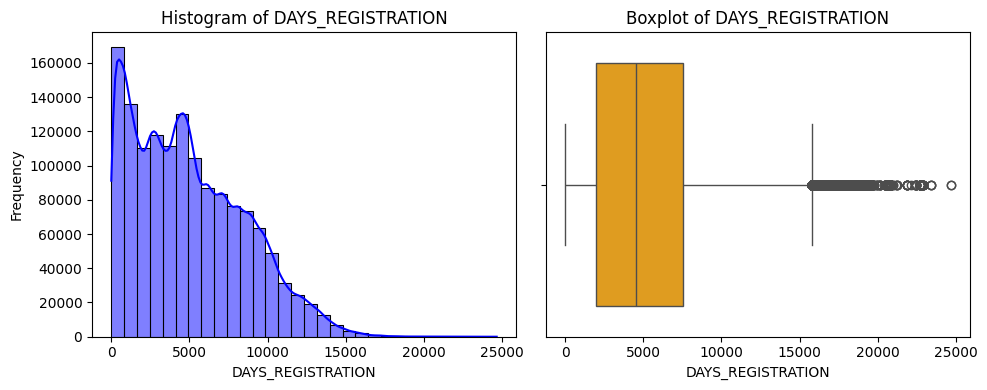

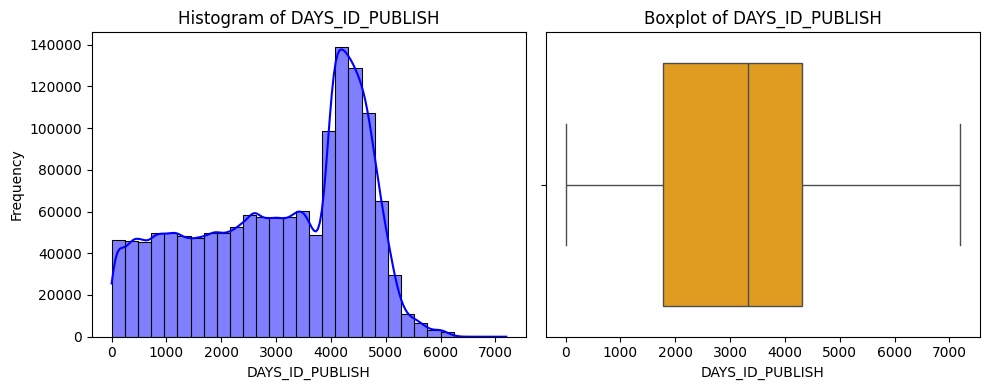

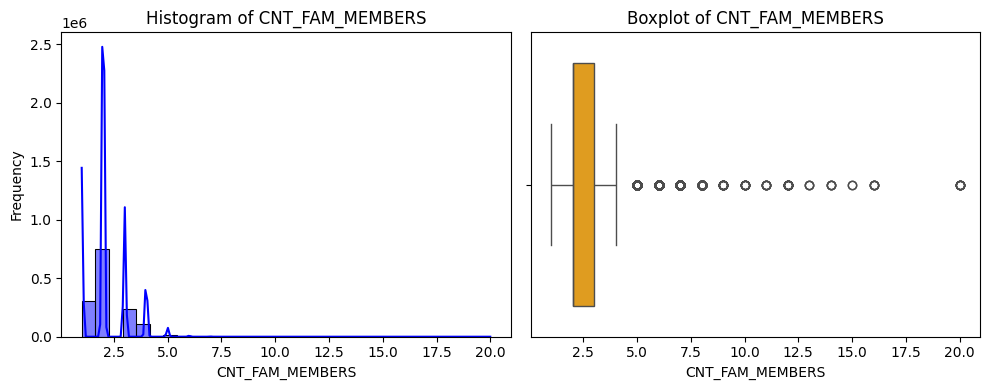

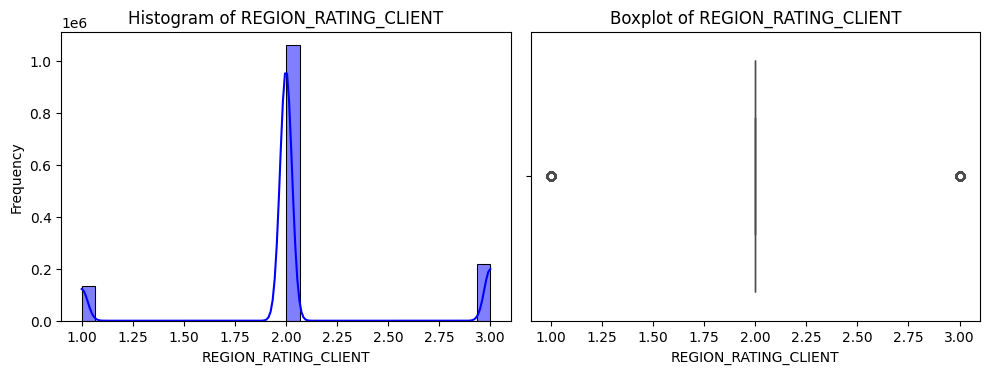

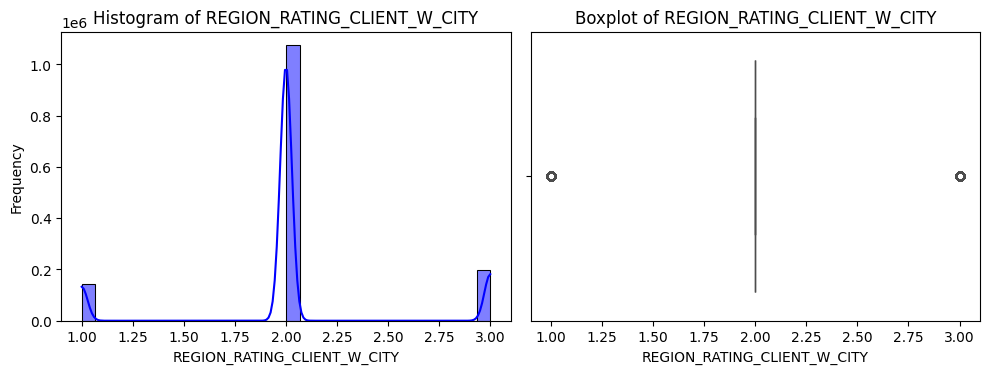

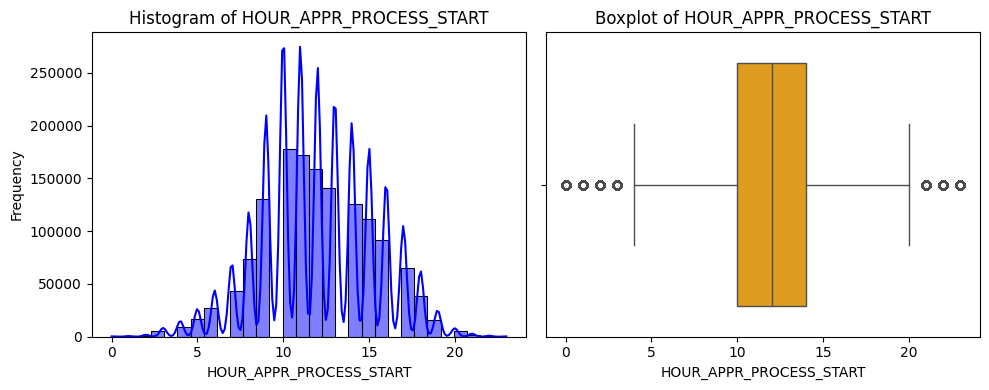

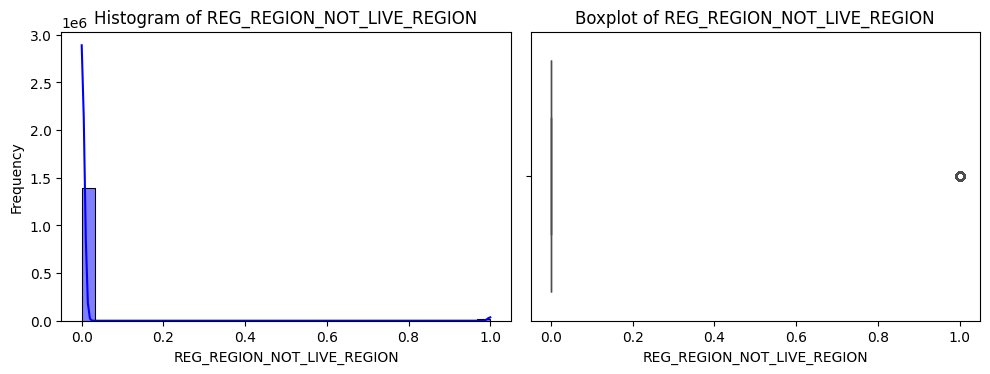

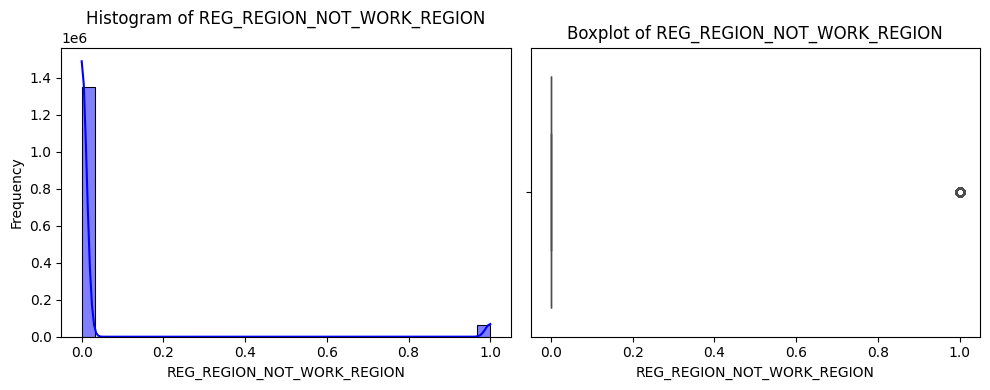

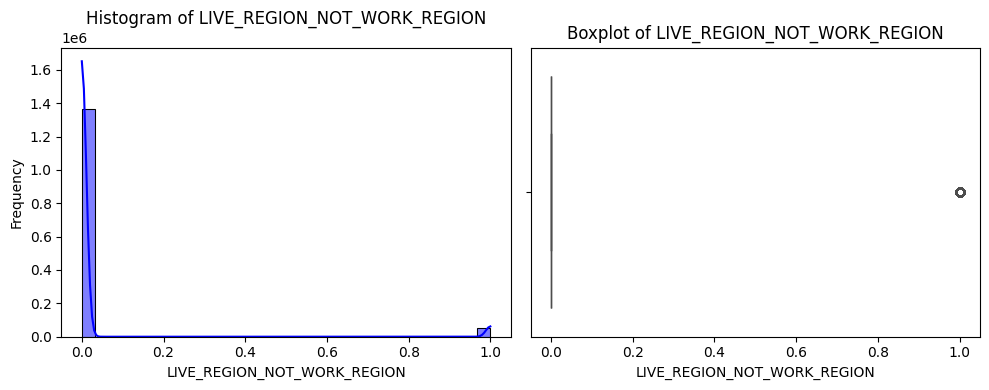

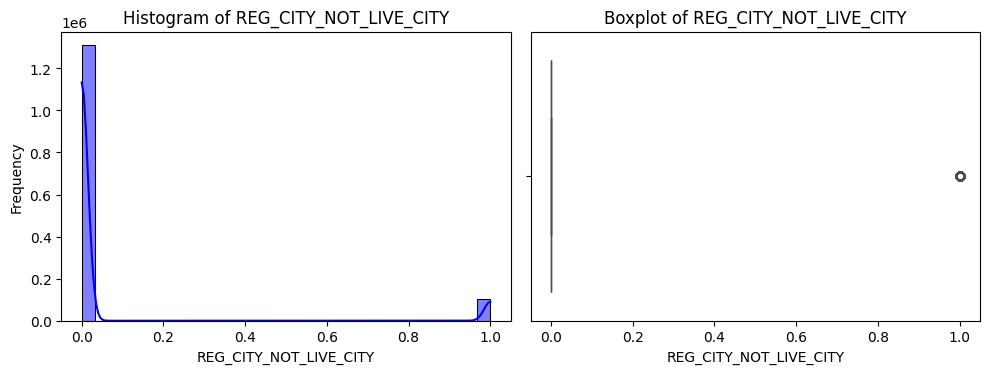

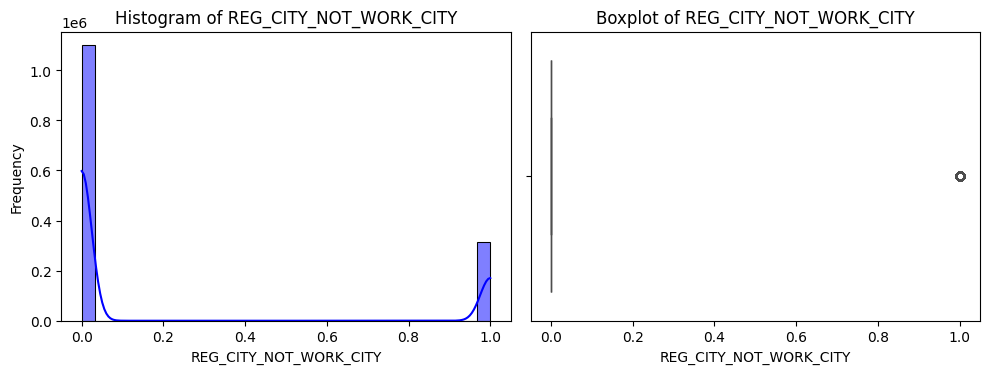

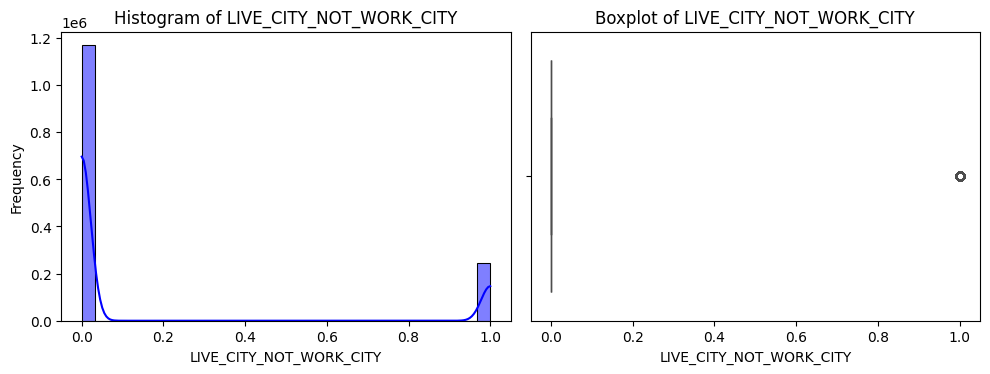

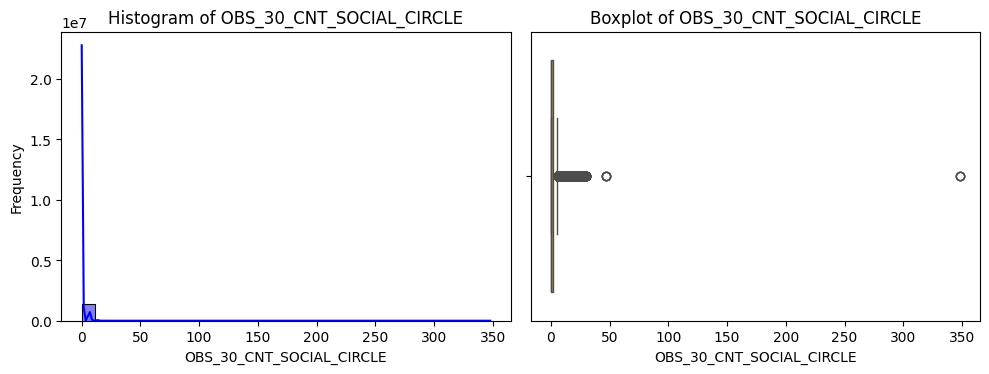

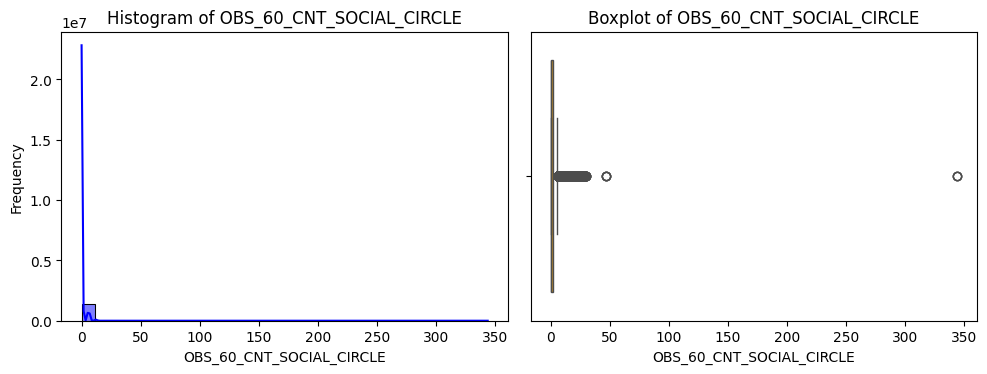

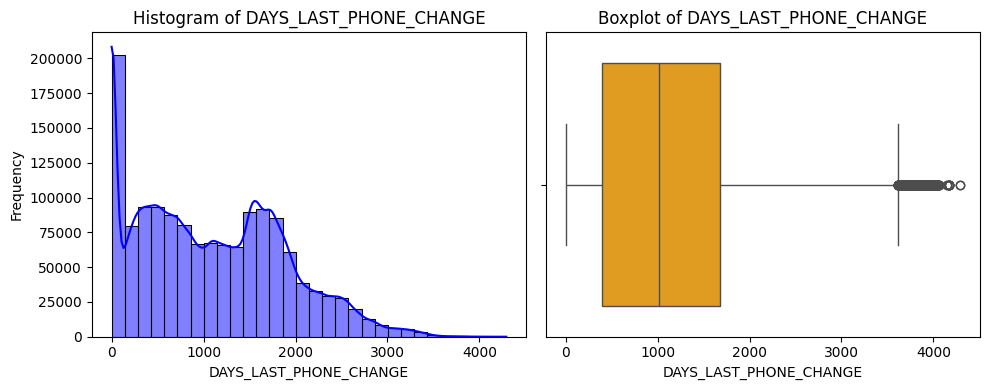

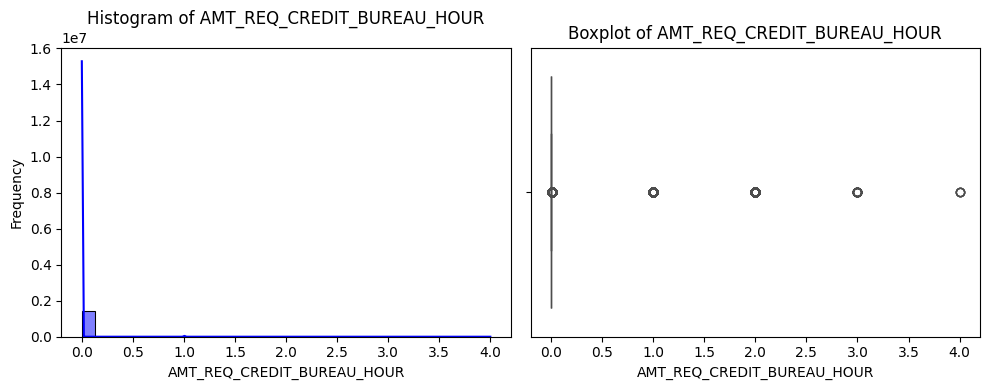

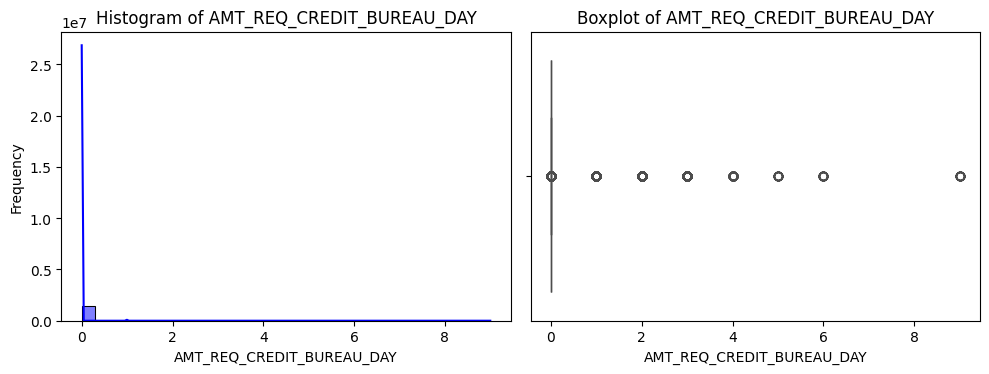

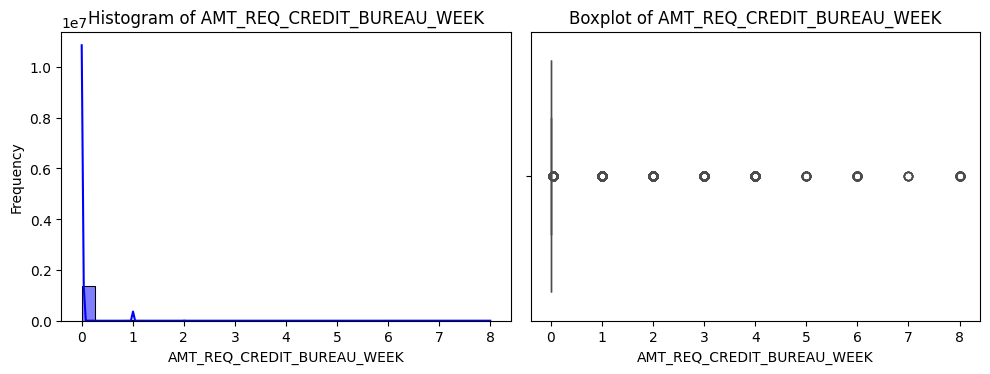

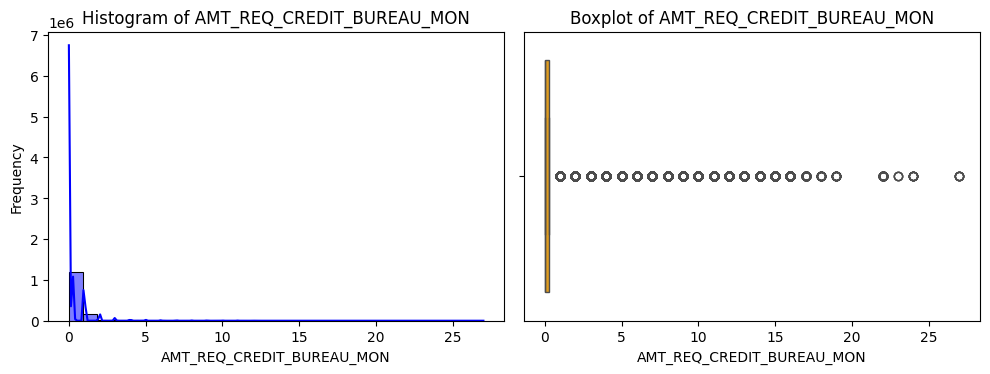

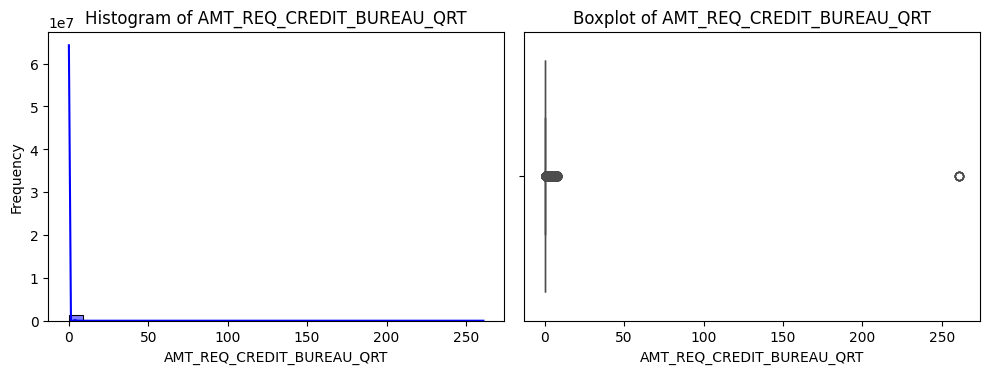

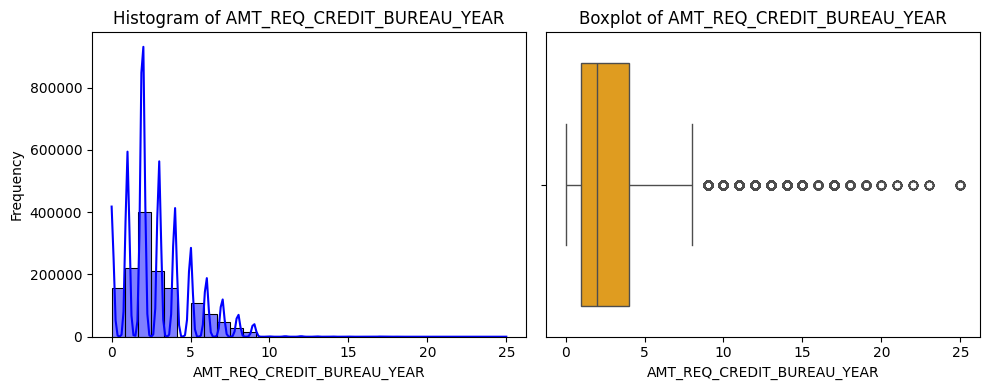

In [14]:
plot_numerical_counts(df, numeric_columns[1:])

In [15]:
#considering important features for outlier removal excluding the primary key "SK_ID_CURR"
columns_to_remove_outliers_from = ['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'SELLERPLACE_AREA','AMT_CREDIT_PREV',
                                   'AMT_ANNUITY','DAYS_EMPLOYED','CNT_FAM_MEMBERS','CNT_CHILDREN','DAYS_LAST_PHONE_CHANGE','OBS_30_CNT_SOCIAL_CIRCLE' 
                                   ,'OBS_60_CNT_SOCIAL_CIRCLE']

In [16]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2.0 * IQR
        upper_bound = Q3 + 2.0 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [17]:
df_cleaned = remove_outliers_iqr(df, columns_to_remove_outliers_from)

In [18]:
# Number of rows before and after outlier removal
print(f"Number of rows before outlier removal: {df.shape[0]}")
print(f"Number of rows after outlier removal: {df_cleaned.shape[0]}")

Number of rows before outlier removal: 1413701
Number of rows after outlier removal: 744419


In [19]:
# Box plots before and after outlier removal
def plot_box_plots(df_before, df_after, columns):
    fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(12, len(columns) * 4))
    for i, column in enumerate(columns):
        sns.boxplot(x=df_before[column], ax=axes[i, 0])
        axes[i, 0].set_title(f'{column} - Before')
        sns.boxplot(x=df_after[column], ax=axes[i, 1])
        axes[i, 1].set_title(f'{column} - After')
    plt.tight_layout()
    plt.show()

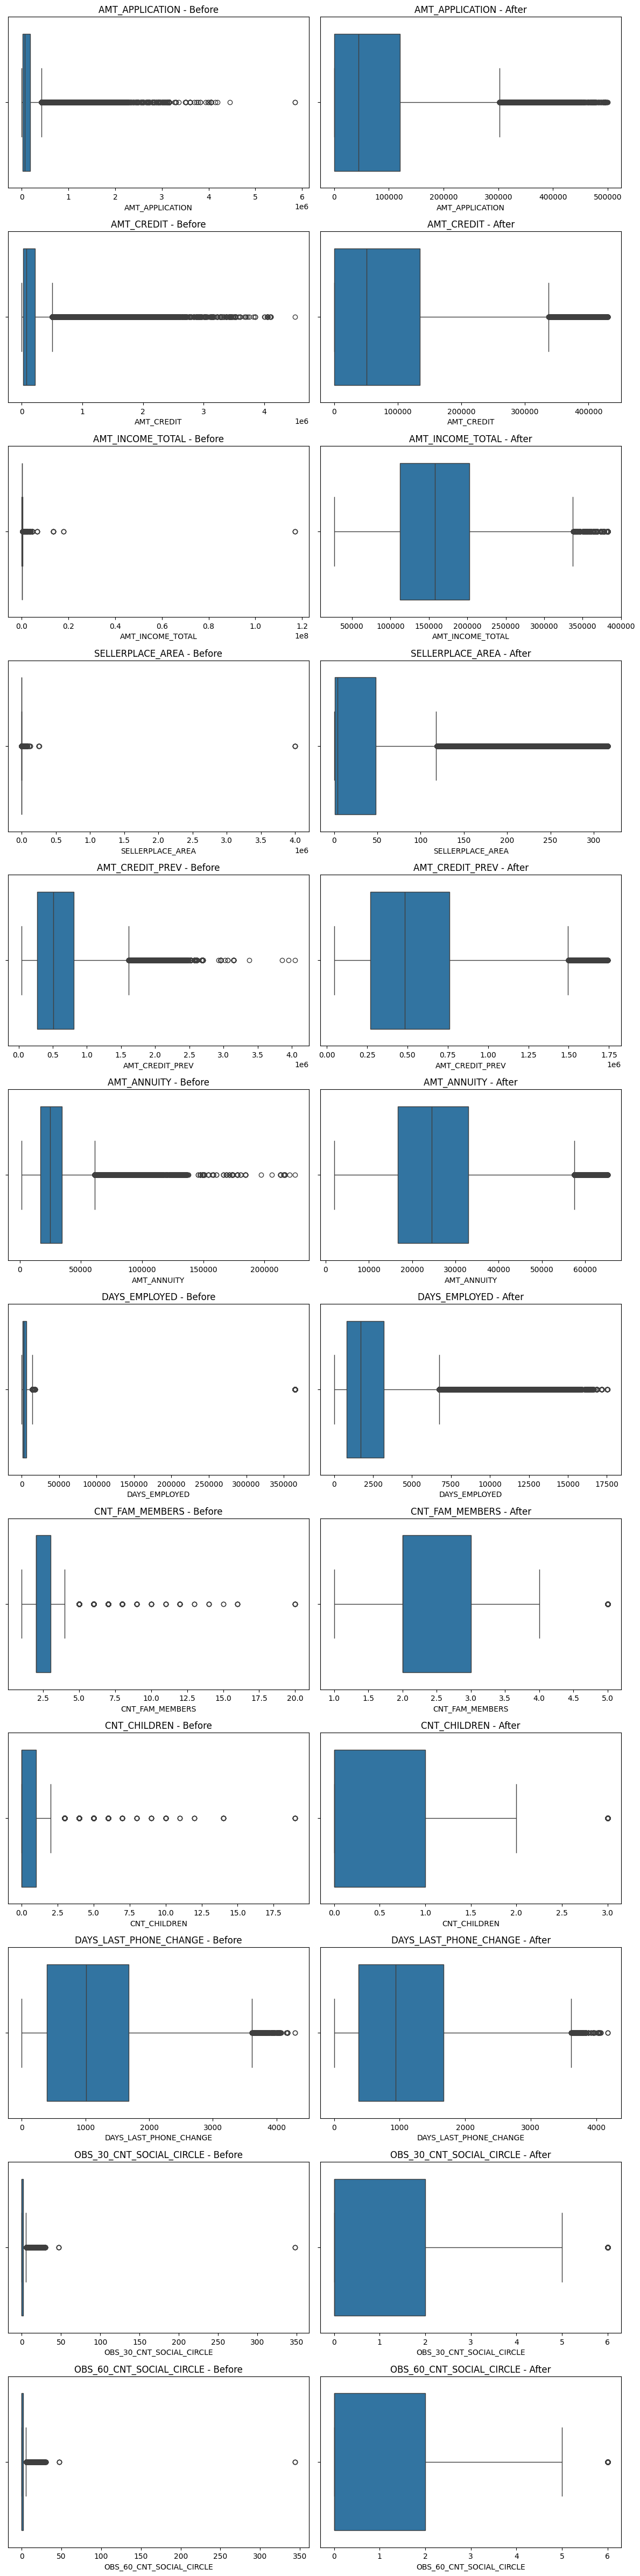

In [20]:
plot_box_plots(df, df_cleaned, columns_to_remove_outliers_from)

In [21]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744419 entries, 0 to 1413700
Data columns (total 60 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   744419 non-null  float64
 1   NAME_CONTRACT_TYPE           744419 non-null  object 
 2   AMT_APPLICATION              744419 non-null  float64
 3   AMT_CREDIT                   744419 non-null  float64
 4   NAME_CASH_LOAN_PURPOSE       744419 non-null  object 
 5   NAME_CONTRACT_STATUS         744419 non-null  object 
 6   DAYS_DECISION                744419 non-null  float64
 7   NAME_PAYMENT_TYPE            744419 non-null  object 
 8   CODE_REJECT_REASON           744419 non-null  object 
 9   NAME_CLIENT_TYPE             744419 non-null  object 
 10  NAME_GOODS_CATEGORY          744419 non-null  object 
 11  NAME_PORTFOLIO               744419 non-null  object 
 12  NAME_PRODUCT_TYPE            744419 non-null  object 
 13  CHA

In [22]:
# Histograms before and after outlier removal
def plot_histograms(df_before, df_after, columns):
    fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(12, len(columns) * 4))
    for i, column in enumerate(columns):
        sns.histplot(df_before[column], bins=30, kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'{column} - Before')
        sns.histplot(df_after[column], bins=30, kde=True, ax=axes[i, 1])
        axes[i, 1].set_title(f'{column} - After')
    plt.tight_layout()
    plt.show()

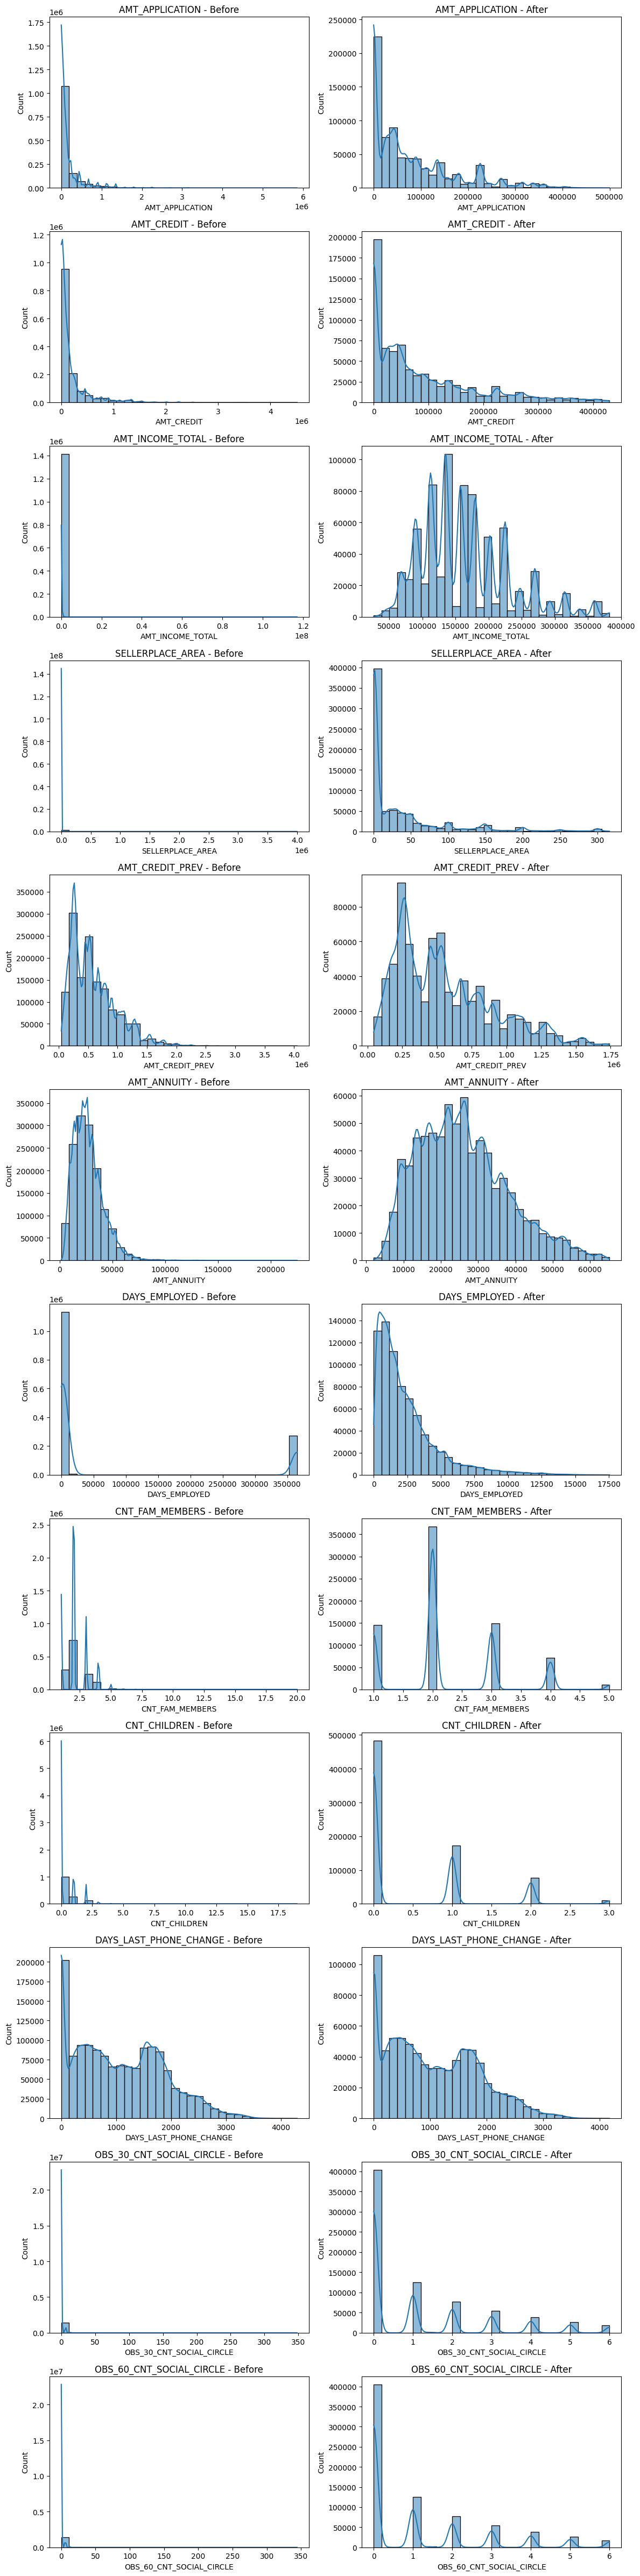

In [23]:
plot_histograms(df, df_cleaned, columns_to_remove_outliers_from)

In [24]:
correlation_features = df_cleaned[['AMT_APPLICATION', 'AMT_CREDIT', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_CHILDREN', 'TARGET',
                                   'AMT_INCOME_TOTAL', 'AMT_CREDIT_PREV', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 
                                   'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 
                                   'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 
                                   'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
                                   'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]

In [25]:
# Compute the correlation matrix
corr_matrix = correlation_features.drop(columns=['TARGET']) .corr()

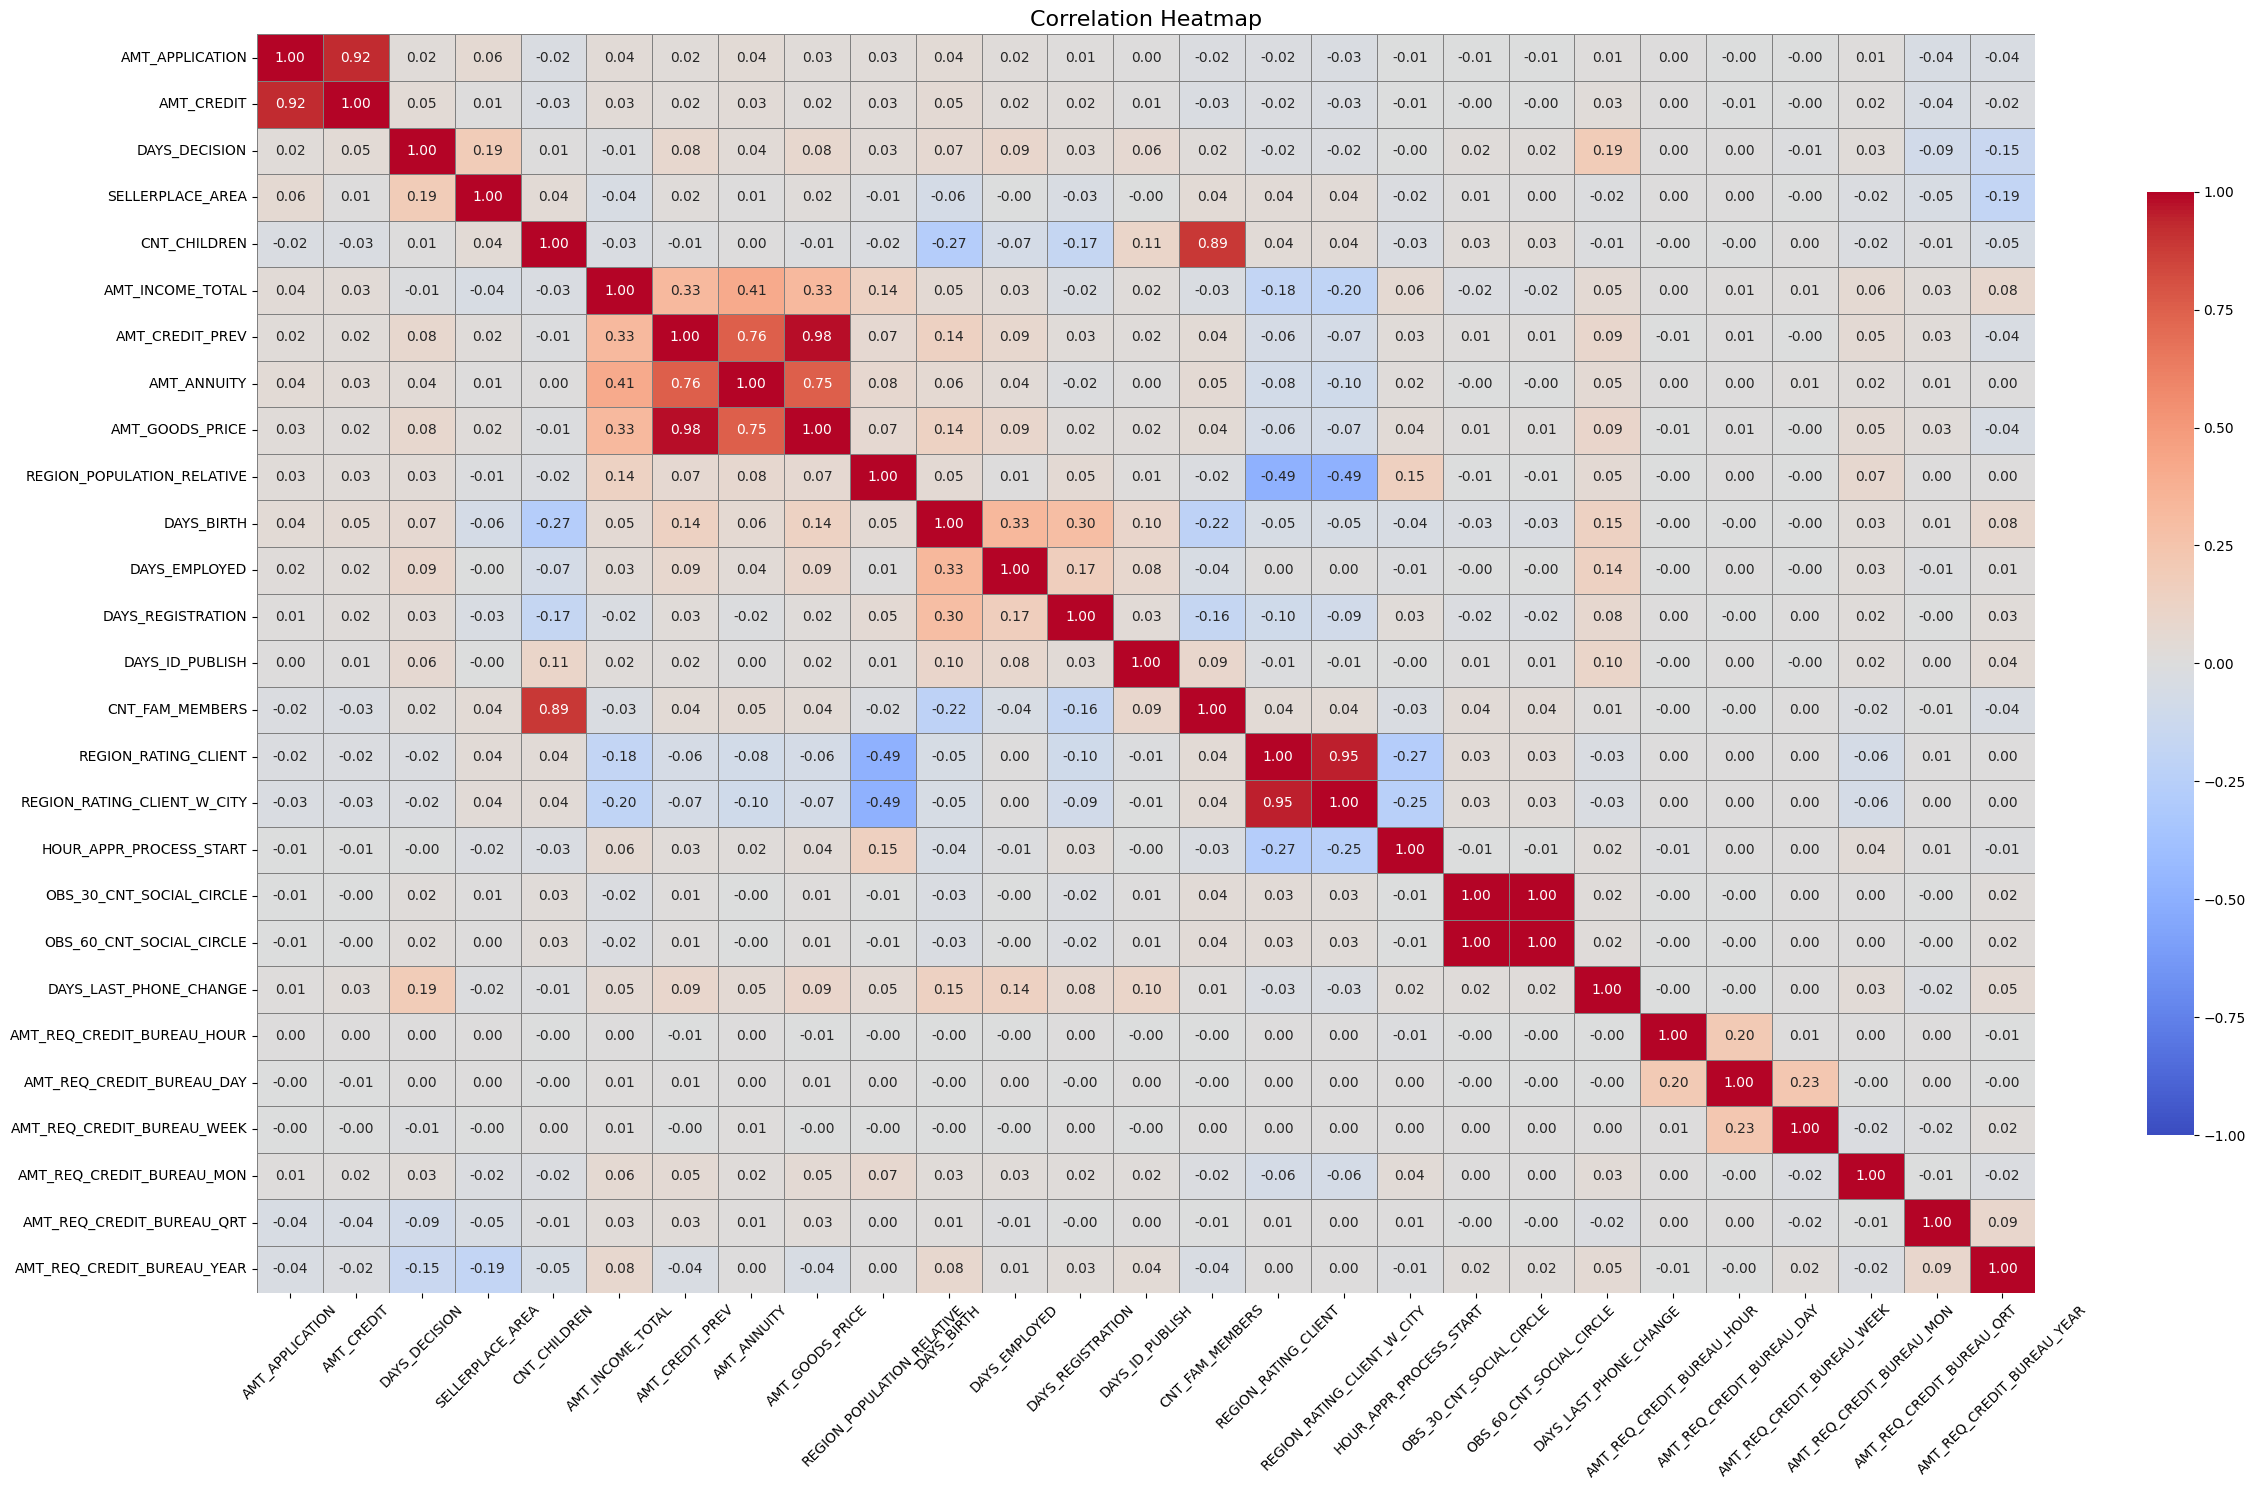

In [26]:
#Set up the matplotlib figure
plt.figure(figsize=(25, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr_matrix,
    annot=True,            # Show correlation values
    cmap='coolwarm',       # Color map
    fmt='.2f',             # Format for annotation
    linewidths=0.5,        # Width of the lines that will divide each cell
    linecolor='gray',      # Color of the lines
    vmin=-1,               # Minimum value for color bar
    vmax=1,                # Maximum value for color bar
    cbar_kws={'shrink': .75} # Color bar size
)

# Set plot title and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.yticks(rotation=0)   # Rotate y labels for better readability

# Adjust layout to prevent clipping of tick labels
plt.tight_layout()

# Show plot
plt.show()

In [27]:
# Calculate correlation of each feature with the target
target_correlations = df.select_dtypes(include=['float64']).corr()['TARGET'].drop('TARGET')

In [28]:
target_correlations

SK_ID_CURR                    -0.001246
AMT_APPLICATION               -0.005583
AMT_CREDIT                    -0.002350
DAYS_DECISION                 -0.039901
SELLERPLACE_AREA              -0.002536
CNT_CHILDREN                   0.020313
AMT_INCOME_TOTAL              -0.002152
AMT_CREDIT_PREV               -0.023622
AMT_ANNUITY                   -0.007411
AMT_GOODS_PRICE               -0.032550
REGION_POPULATION_RELATIVE    -0.035028
DAYS_BIRTH                    -0.074866
DAYS_EMPLOYED                 -0.049684
DAYS_REGISTRATION             -0.043123
DAYS_ID_PUBLISH               -0.051037
CNT_FAM_MEMBERS                0.014847
REGION_RATING_CLIENT           0.056932
REGION_RATING_CLIENT_W_CITY    0.059700
HOUR_APPR_PROCESS_START       -0.022448
REG_REGION_NOT_LIVE_REGION     0.003011
REG_REGION_NOT_WORK_REGION     0.006862
LIVE_REGION_NOT_WORK_REGION    0.004159
REG_CITY_NOT_LIVE_CITY         0.040681
REG_CITY_NOT_WORK_CITY         0.049353
LIVE_CITY_NOT_WORK_CITY        0.032757


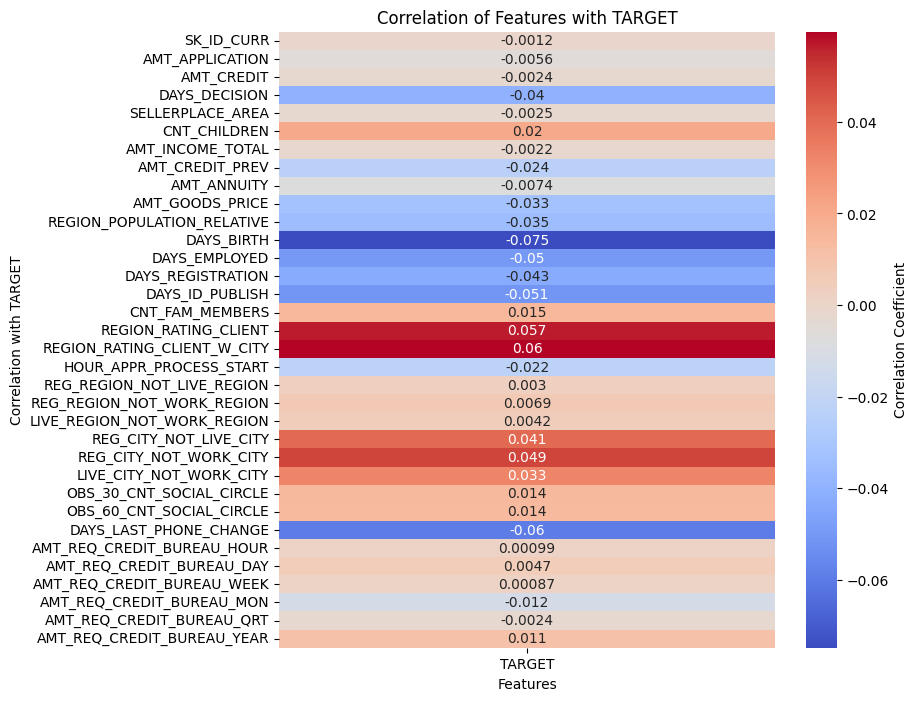

In [29]:
# Create a heatmap of the target correlations
plt.figure(figsize=(8, 8))
sns.heatmap(target_correlations.to_frame(), annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation of Features with TARGET')
plt.xlabel('Features')
plt.ylabel('Correlation with TARGET')
plt.show()

In [30]:
df_cleaned.to_csv("C:/Users/rajpu/OneDrive/Desktop/Bank Loan Case Study/Cleaned Datasets/Final Cleaned Data.csv", index = False)